In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

from datetime import datetime, timedelta
pd.set_option('display.max_columns', 5000)

# Sleep Data Analysis

In [6]:
sleep_df = pd.read_csv('../Project/sleep-export2.csv')

In [7]:
sleep_df.head()

,Unnamed: 0,efficiency,has_sleep_data,com.samsung.health.sleep.datauuid,quality,com.samsung.health.sleep.custom,com.samsung.health.sleep.end_time,original_wake_up_time,com.samsung.health.sleep.start_time,com.samsung.health.sleep.time_offset,com.samsung.health.sleep.update_time,original_bed_time,com.samsung.health.sleep.create_time,original_efficiency
0,0,92.663040,1.0,03f12ce0-9ade-5c74-9d57-686fd3966f2a,50003.0,NaN,1520501400000,1.520501e+12,1520479380000,UTC-0400,1520516398387,1.520479e+12,1520501522181,92.66304
1,1,87.788020,1.0,0419de25-ff8a-e425-0864-7e83b7f5d991,NaN,NaN,1519565280000,NaN,1519539300000,UTC-0400,1519565416332,NaN,1519565416332,NaN
2,2,90.026955,1.0,048b90e0-1e31-7875-337c-e9d8c24bea59,NaN,NaN,1527932940000,NaN,1527910620000,UTC-0300,1527932972094,NaN,1527932972094,NaN
3,3,93.162390,1.0,058e45d4-2bda-fc5f-6545-c965c65fea43,NaN,NaN,1529749920000,NaN,1529735940000,UTC-0300,1529750846337,NaN,1529750846337,NaN
4,4,93.750000,1.0,059021fb-39a7-ab8c-e488-662743e11821,NaN,NaN,1515159660000,NaN,1515128040000,UTC-0400,1515159899850,NaN,1515159899850,NaN


In [8]:
sleep_df['com.samsung.health.sleep.start_time'] = pd.to_datetime(sleep_df['com.samsung.health.sleep.start_time'], unit='ms')
sleep_df['com.samsung.health.sleep.end_time'] = pd.to_datetime(sleep_df['com.samsung.health.sleep.end_time'], unit='ms')
sleep_df['com.samsung.health.sleep.create_time'] = pd.to_datetime(sleep_df['com.samsung.health.sleep.create_time'], unit='ms')
sleep_df['com.samsung.health.sleep.update_time'] = pd.to_datetime(sleep_df['com.samsung.health.sleep.update_time'], unit='ms')
sleep_df['original_bed_time'] = pd.to_datetime(sleep_df['original_bed_time'], unit='ms')
sleep_df['original_wake_up_time'] = pd.to_datetime(sleep_df['original_wake_up_time'], unit='ms')

In [9]:
sleep_df = sleep_df.rename(columns={'com.samsung.health.sleep.start_time': 'start_time', 
                                    'com.samsung.health.sleep.end_time': 'end_time',
                                    'com.samsung.health.sleep.create_time': 'create_time',
                                    'com.samsung.health.sleep.update_time': 'update_time',
                                    'com.samsung.health.sleep.time_offset': 'time_offset'})

(array([ 3., 27., 80., 76., 22.,  8.,  7.,  7.,  9.,  5., 11.,  5.,  0.,
         0.,  0.,  0.,  0.,  3.,  1.,  2.,  4.,  1.,  5.,  3.]),
 array([ 0.31666667,  1.28958333,  2.2625    ,  3.23541667,  4.20833333,
         5.18125   ,  6.15416667,  7.12708333,  8.1       ,  9.07291667,
        10.04583333, 11.01875   , 11.99166667, 12.96458333, 13.9375    ,
        14.91041667, 15.88333333, 16.85625   , 17.82916667, 18.80208333,
        19.775     , 20.74791667, 21.72083333, 22.69375   , 23.66666667]),
 <a list of 24 Patch objects>)

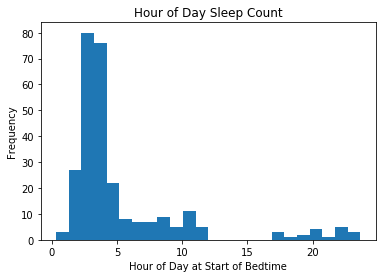

In [10]:
start_df = (sleep_df['start_time'].dt.hour + sleep_df['start_time'].dt.minute/60 + sleep_df['start_time'].dt.second/3600)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Hour of Day at Start of Bedtime')
ax.set_ylabel('Frequency')
ax.set_title('Hour of Day Sleep Count')
ax.hist(start_df, bins=24)

(array([ 9.,  3.,  2.,  1.,  5.,  6.,  5., 11.,  4.,  0.,  2.,  3.,  2.,
         0.,  5.,  4.,  4.,  0.,  2.,  2.,  3.,  1.,  4.,  3.,  4.,  3.,
         5.,  7.,  9., 10., 11., 11.,  8., 11., 15., 15., 15., 10., 13.,
        13., 11.,  4.,  8.,  3.,  6.,  2.,  2.,  1.,  0.,  1.]),
 array([ 10.  ,  22.14,  34.28,  46.42,  58.56,  70.7 ,  82.84,  94.98,
        107.12, 119.26, 131.4 , 143.54, 155.68, 167.82, 179.96, 192.1 ,
        204.24, 216.38, 228.52, 240.66, 252.8 , 264.94, 277.08, 289.22,
        301.36, 313.5 , 325.64, 337.78, 349.92, 362.06, 374.2 , 386.34,
        398.48, 410.62, 422.76, 434.9 , 447.04, 459.18, 471.32, 483.46,
        495.6 , 507.74, 519.88, 532.02, 544.16, 556.3 , 568.44, 580.58,
        592.72, 604.86, 617.  ]),
 <a list of 50 Patch objects>)

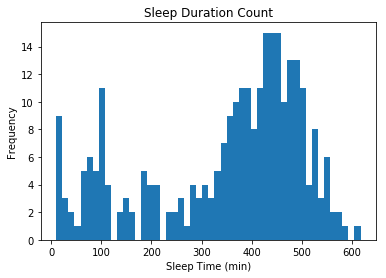

In [11]:
end_df = (sleep_df['end_time'].dt.hour + sleep_df['end_time'].dt.minute/60 + sleep_df['end_time'].dt.second/3600)
duration_df = (end_df - start_df) * 60
duration_df[duration_df<0] = duration_df[duration_df<0] + 1440

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Sleep Time (min)')
ax.set_ylabel('Frequency')
ax.set_title('Sleep Duration Count')
ax.hist(duration_df, bins=50)

C:\Users\alexy\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


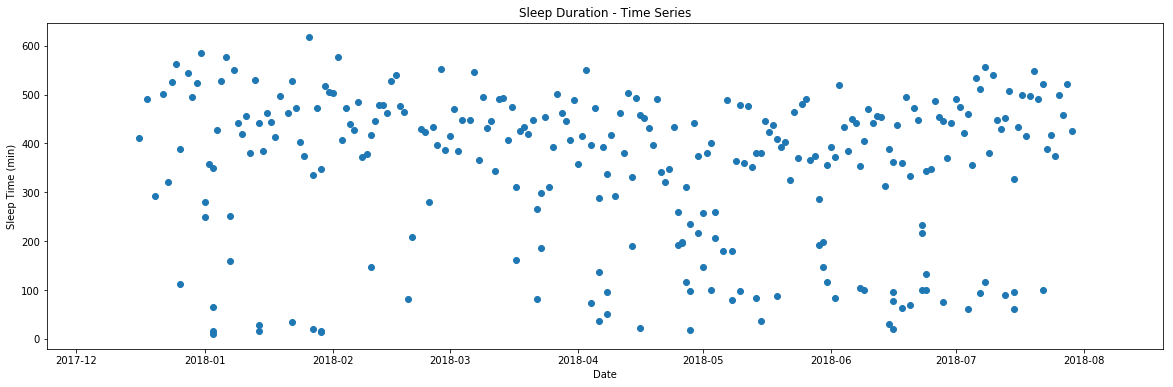

In [12]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('Date')
ax.set_ylabel('Sleep Time (min)')
ax.set_title('Sleep Duration - Time Series')
ax.scatter(sleep_df['end_time'].dt.date, duration_df)

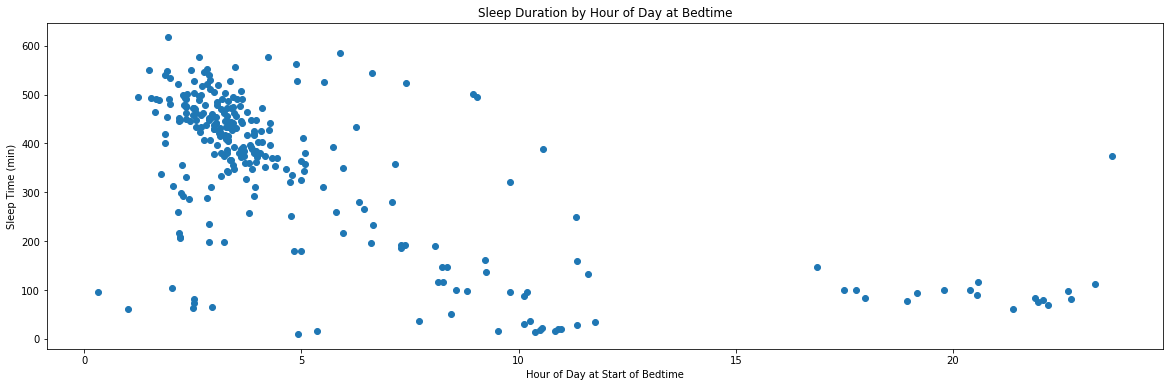

In [13]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('Hour of Day at Start of Bedtime')
ax.set_ylabel('Sleep Time (min)')
ax.set_title('Sleep Duration by Hour of Day at Bedtime')
ax.scatter(start_df, duration_df)

In [14]:
sleep_df['quality'].unique()
# What does this mean?? It is different from the efficiency column

array([50003.,    nan, 50004., 50005., 50002., 50001.])

In [15]:
sleep_df[sleep_df['quality'].notnull()]
# Most of these have modified bed times and wake up times
# Quality column must be a user-entered sleep quality value, on a scale from 1 to 5

,Unnamed: 0,efficiency,has_sleep_data,com.samsung.health.sleep.datauuid,quality,com.samsung.health.sleep.custom,end_time,original_wake_up_time,start_time,time_offset,update_time,original_bed_time,create_time,original_efficiency
0,0,92.663040,1.0,03f12ce0-9ade-5c74-9d57-686fd3966f2a,50003.0,NaN,2018-03-08 09:30:00,2018-03-08 09:30:00,2018-03-08 03:23:00,UTC-0400,2018-03-08 13:39:58.387,2018-03-08 03:23:00,2018-03-08 09:32:02.181,92.663040
8,8,87.598946,1.0,095e5c43-db7b-eb38-9bc1-c8b37e55c9e8,50003.0,NaN,2018-02-09 09:18:00,2018-02-09 09:18:00,2018-02-09 03:00:00,UTC-0400,2018-02-09 10:19:20.353,2018-02-09 03:00:00,2018-02-09 09:20:11.192,87.598946
21,21,94.575050,1.0,161a352b-f9fd-1a38-b8ae-6ef0fa498d4b,50004.0,NaN,2018-02-27 12:02:00,2018-02-27 12:02:00,2018-02-27 02:50:00,UTC-0400,2018-02-27 12:32:09.493,2018-02-27 02:50:00,2018-02-27 12:03:34.825,94.575050
22,22,96.572580,1.0,16c97b07-7605-bb1b-22a1-b48d5ac17ef7,50005.0,NaN,2018-03-09 11:42:00,2018-03-09 11:42:00,2018-03-09 03:26:00,UTC-0400,2018-03-09 12:41:30.789,2018-03-09 03:26:00,2018-03-09 11:42:36.968,96.572580
31,31,95.979900,1.0,1e75a548-8b60-1bce-c183-c0dfd44e798d,50003.0,NaN,2018-02-26 10:53:00,2018-02-26 10:53:00,2018-02-26 04:16:00,UTC-0400,2018-02-26 12:36:56.131,2018-02-26 04:16:00,2018-02-26 10:54:38.160,95.979900
45,45,94.545456,1.0,28d482ea-9280-e6d6-4f83-13185c728a40,50004.0,NaN,2018-02-05 10:42:00,2018-02-05 10:42:00,2018-02-05 03:23:00,UTC-0400,2018-02-05 11:06:18.310,2018-02-05 03:23:00,2018-02-05 10:53:49.697,94.545456
55,55,96.363630,1.0,353533e6-8753-a564-e67e-171c0386c61c,50003.0,NaN,2018-03-03 10:19:00,2018-03-03 10:19:00,2018-03-03 03:55:00,UTC-0400,2018-03-03 10:40:27.836,2018-03-03 03:55:00,2018-03-03 10:20:10.002,96.363630
57,57,93.049330,1.0,35619088-ec69-e14e-8fa8-d0a210dd42e6,50003.0,NaN,2018-03-11 09:36:00,2018-03-11 09:36:00,2018-03-11 02:11:00,UTC-0300,2018-03-11 11:21:32.812,2018-03-11 02:11:00,2018-03-11 09:37:49.613,93.049330
62,62,91.666670,1.0,36f694bb-3931-d96d-90b0-fca8d63b2865,50003.0,NaN,2018-03-15 09:41:00,2018-03-15 09:41:00,2018-03-15 02:54:00,UTC-0300,2018-03-15 17:57:36.613,2018-03-15 02:54:00,2018-03-15 09:42:06.860,91.666670
68,68,93.066666,1.0,3dac1176-93ff-ca17-4708-b4a77ce543a4,50003.0,NaN,2018-01-25 09:55:00,2018-01-25 09:55:00,2018-01-25 03:41:00,UTC-0400,2018-01-25 12:18:39.997,2018-01-25 03:41:00,2018-01-25 10:09:48.313,93.066666


In [16]:
sleep_df['efficiency'].mean()

88.85711181362005

In [17]:
quality_df = sleep_df['efficiency'].copy()

In [18]:
pd.concat([duration_df, sleep_df['end_time'].dt.date], axis=1)

,0,end_time
0,367.0,2018-03-08
1,433.0,2018-02-25
2,372.0,2018-06-02
3,233.0,2018-06-23
4,527.0,2018-01-05
5,477.0,2018-05-12
6,442.0,2018-06-07
7,249.0,2018-01-01
8,378.0,2018-02-09
9,37.0,2018-05-15


In [19]:
sleep_df['end_time'].dt.date.sort_values()

26     2017-12-16
175    2017-12-18
43     2017-12-20
116    2017-12-22
167    2017-12-23
134    2017-12-24
189    2017-12-25
258    2017-12-26
123    2017-12-26
210    2017-12-28
95     2017-12-29
168    2017-12-30
236    2017-12-31
88     2018-01-01
7      2018-01-01
118    2018-01-02
197    2018-01-03
230    2018-01-03
268    2018-01-03
138    2018-01-03
51     2018-01-04
4      2018-01-05
124    2018-01-06
206    2018-01-07
24     2018-01-07
228    2018-01-08
104    2018-01-09
34     2018-01-10
173    2018-01-11
212    2018-01-12
          ...    
150    2018-07-06
273    2018-07-07
75     2018-07-07
192    2018-07-08
255    2018-07-08
46     2018-07-09
213    2018-07-10
106    2018-07-11
29     2018-07-12
52     2018-07-13
263    2018-07-13
171    2018-07-14
209    2018-07-15
47     2018-07-15
58     2018-07-15
90     2018-07-16
89     2018-07-17
182    2018-07-18
76     2018-07-19
137    2018-07-20
229    2018-07-21
86     2018-07-22
219    2018-07-22
126    2018-07-23
42     201

In [20]:
ax = pd.concat([quality_df, sleep_df['end_time'].dt.date], axis=1)
ax[ax['efficiency']==0]

,efficiency,end_time
117,0.0,2018-04-28
138,0.0,2018-01-03
156,0.0,2018-05-06
160,0.0,2018-01-29
181,0.0,2018-01-29
183,0.0,2018-01-14
197,0.0,2018-01-03
264,0.0,2018-05-08


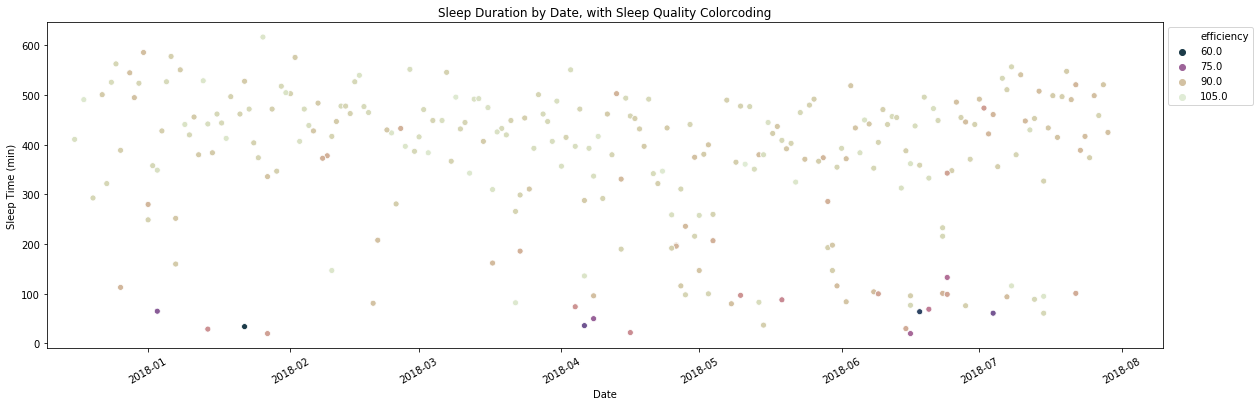

In [21]:
fig = plt.figure(figsize=(20, 6))
palette = sns.cubehelix_palette(4, start=2, rot=1, dark=.2, light=.9, as_cmap=True, reverse=True)
ax = sns.scatterplot(data=pd.concat([duration_df, sleep_df['end_time'].dt.date], axis=1), x='end_time',y=0, hue=quality_df[quality_df!=0], palette=palette)

ax = ax.set(xlabel='Date', ylabel='Sleep Time (min)', xlim=('2017-12-10', '2018-08-10'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Sleep Duration by Date, with Sleep Quality Colorcoding')
plt.show(ax)

# Points with efficiency == 0 are dropped from this plot

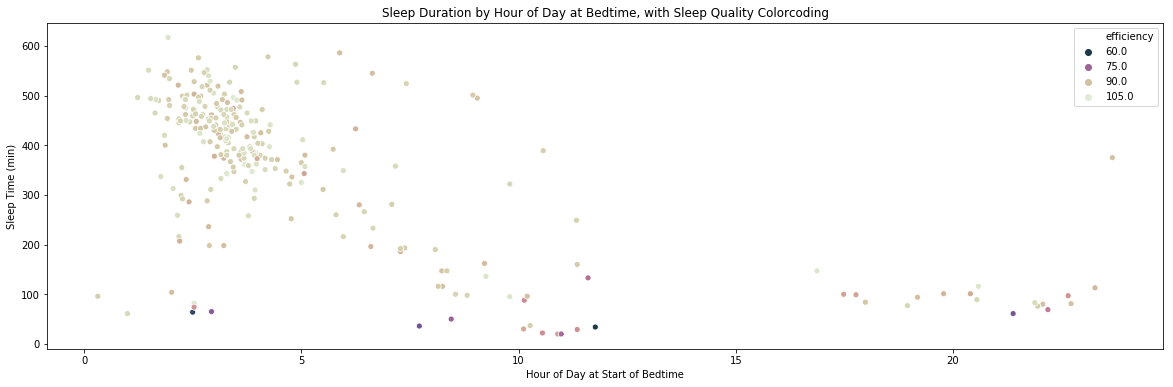

In [22]:
fig = plt.figure(figsize=(20, 6))
palette = sns.cubehelix_palette(4, start=2, rot=1, dark=.2, light=.9, as_cmap=True, reverse=True)
ax = sns.scatterplot(data=pd.concat([duration_df, start_df], axis=1), x='start_time',y=0, hue=quality_df[quality_df!=0], palette=palette)
ax = ax.set(xlabel='Hour of Day at Start of Bedtime', ylabel='Sleep Time (min)')
plt.title('Sleep Duration by Hour of Day at Bedtime, with Sleep Quality Colorcoding')
plt.show(ax)

# Points with efficiency == 0 are dropped from this plot

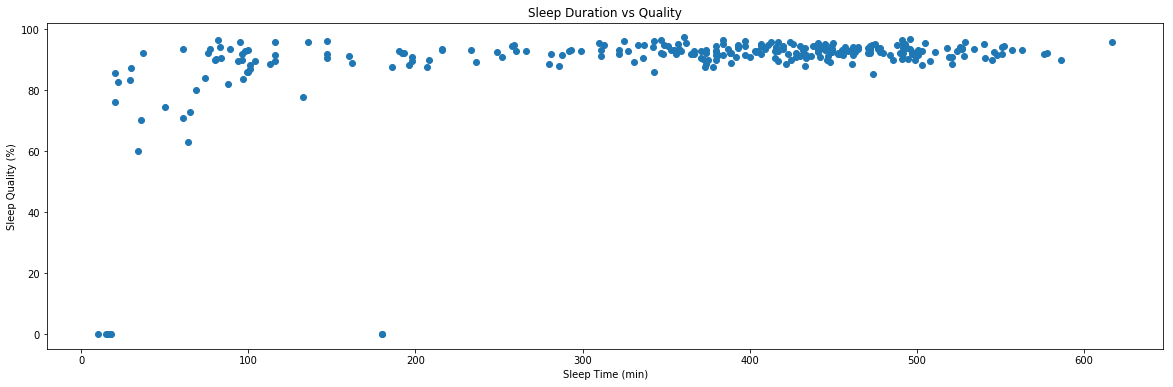

In [23]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('Sleep Time (min)')
ax.set_ylabel('Sleep Quality (%)')
ax.set_title('Sleep Duration vs Quality')
ax.scatter(duration_df, quality_df)

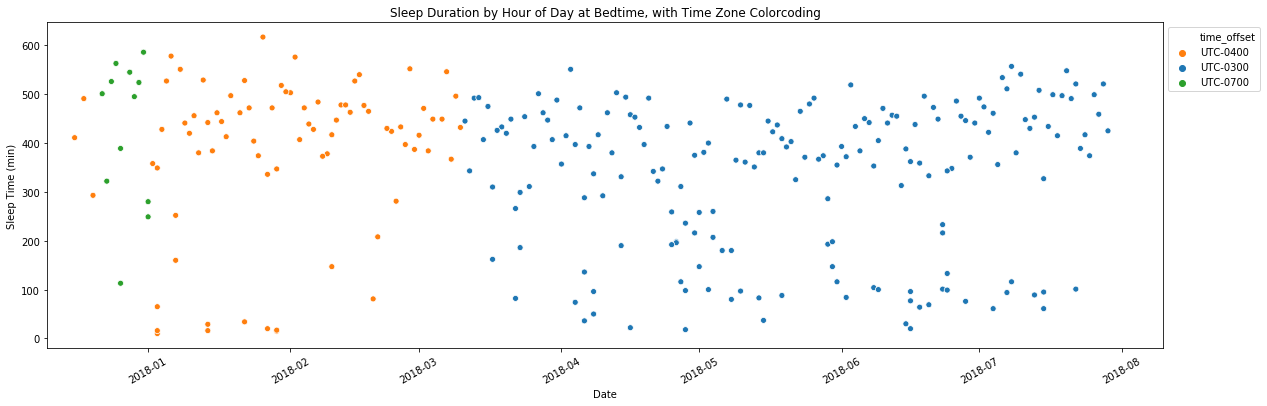

In [24]:
fig = plt.figure(figsize=(20, 6))
palette = {"UTC-0300":"C0","UTC-0400":"C1","UTC-0700":"C2"}
ax = sns.scatterplot(data=pd.concat([duration_df, sleep_df['end_time'].dt.date], axis=1), x='end_time',y=0, hue=sleep_df['time_offset'], palette=palette)
ax = ax.set(xlabel='Date', ylabel='Sleep Time (min)', xlim=('2017-12-10', '2018-08-10'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Sleep Duration by Hour of Day at Bedtime, with Time Zone Colorcoding')
plt.show(ax)

In [33]:
pd.concat([start_df, sleep_df_num], axis=1)

,start_time,0
0,3.383333,2018.524372
1,6.250000,2018.494688
2,3.616667,2018.760025
3,6.650000,2018.817641
4,4.900000,2018.354987
5,2.333333,2018.702544
6,3.033333,2018.773790
7,11.333333,2018.344233
8,3.000000,2018.450377
9,10.266667,2018.710831


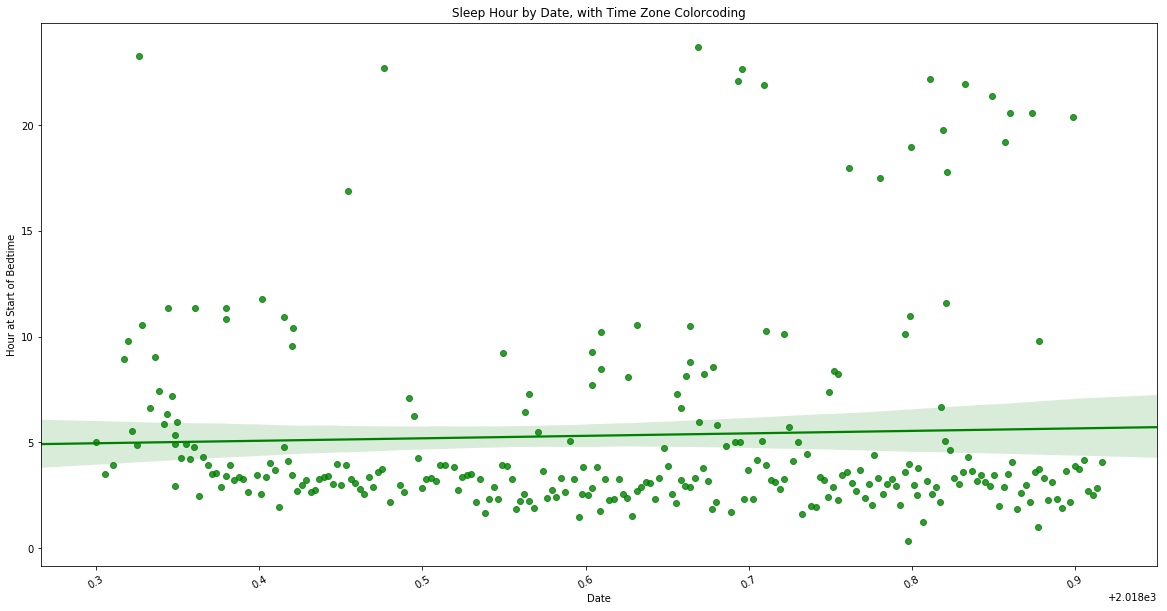

In [38]:
sleep_df_num = np.array(mdates.date2num(sleep_df['end_time']))/365
sleep_df_num = pd.DataFrame(sleep_df_num)
sleep_df_num = pd.concat([start_df, sleep_df_num], axis=1)
sleep_df_num.columns = ['start_time', 'date']

fig = plt.figure(figsize=(20, 10))
ax = sns.regplot(data=pd.concat([sleep_df_num.iloc[:,1], sleep_df_num.iloc[:,0]], axis=1), x='date',y='start_time', color='g')
ax = ax.set(xlabel='Date', ylabel='Hour at Start of Bedtime')
plt.xticks(rotation=30)
plt.title('Sleep Hour by Date, with Time Zone Colorcoding')
plt.show(ax)

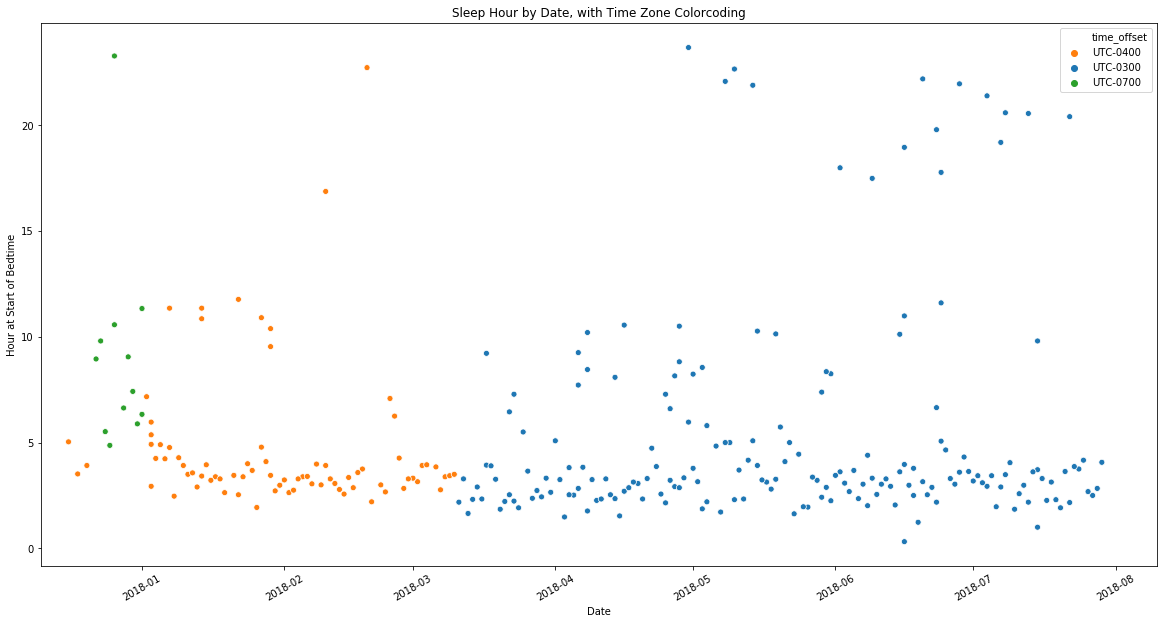

In [39]:
fig = plt.figure(figsize=(20, 10))
palette = {"UTC-0300":"C0","UTC-0400":"C1","UTC-0700":"C2"}
ax = sns.scatterplot(data=pd.concat([start_df, sleep_df['end_time'].dt.date], axis=1), x='end_time',y='start_time', hue=sleep_df['time_offset'], palette=palette)
ax = ax.set(xlabel='Date', ylabel='Hour at Start of Bedtime', xlim=('2017-12-10', '2018-08-10'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Sleep Hour by Date, with Time Zone Colorcoding')
plt.show(ax)

In [40]:
wake_date_df = pd.concat([end_df, sleep_df['end_time'].dt.date], axis=1)
wake_date_df.columns = ['end_hour', 'end_date']
wake_date_df

,end_hour,end_date
0,9.500000,2018-03-08
1,13.466667,2018-02-25
2,9.816667,2018-06-02
3,10.533333,2018-06-23
4,13.683333,2018-01-05
5,10.283333,2018-05-12
6,10.400000,2018-06-07
7,15.483333,2018-01-01
8,9.300000,2018-02-09
9,10.883333,2018-05-15


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlabel'

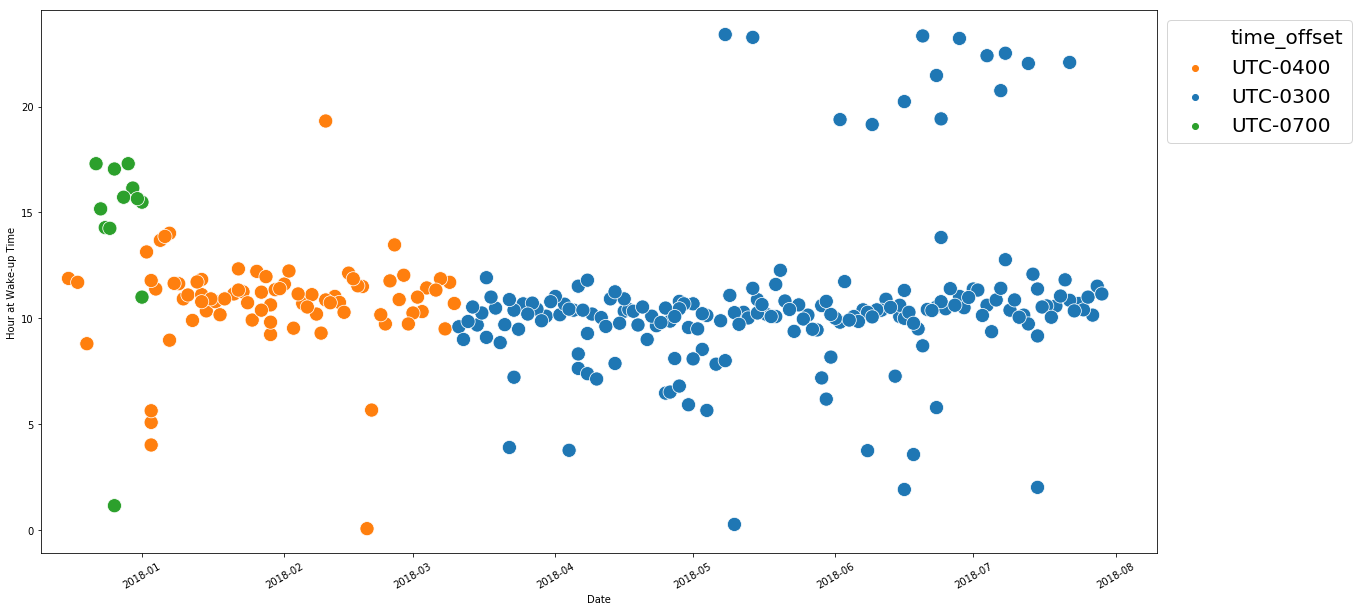

In [49]:
fig = plt.figure(figsize=(20, 10))
palette = {"UTC-0300":"C0","UTC-0400":"C1","UTC-0700":"C2"}
ax = sns.scatterplot(data=wake_date_df, x='end_date',y='end_hour', hue=sleep_df['time_offset'], palette=palette, s=200)
ax = ax.set(xlabel='Date', ylabel='Hour at Wake-up Time', xlim=('2017-12-10', '2018-08-10'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1), fontsize='20')
plt.set_xlabel(fontsize='20')
plt.title('Wake-up Hour by Date, with Time Zone Colorcoding', fontsize='20')
plt.show(ax)

### Observations
- Majority of sleep time starts at 2 and 3 AM
- Majority of sleep durations last between 300mins to 550mins (5 hours to ~9 hours)
- Full night's rest occur mostly between 2 and 5 AM
- Lower quality (efficiency) sleep (below 80%) occurs at lower sleep time durations >150mins
- Lower sleep time occurred more often after mid-March 2018 in timezone UTC-0300

# Exercise Data Analysis

In [239]:
exercise_df = pd.read_csv('../Project/exercise.csv')

In [330]:
exercise_df.head(20)

,Unnamed: 0,end_time,altitude_loss,max_altitude,start_time,count,altitude_gain,exercise_custom_type,duration,deviceuuid,max_heart_rate,max_rpm,mean_heart_rate,pkg_name,max_cadence,time_offset,mean_caloricburn_rate,incline_distance,exercise_type,decline_distance,max_speed,mean_power,max_power,mean_rpm,calorie,mean_cadence,mean_speed,update_time,min_altitude,min_heart_rate,count_type,live_data,max_caloricburn_rate,custom,comment,additional,distance,datauuid,create_time
0,0,2018-04-07 17:40:40.673,NaN,NaN,2018-04-07 17:26:10.149,NaN,NaN,NaN,870524,F/D7+hL5E5,0.0,NaN,0.0,com.sec.android.app.shealth,0.0,UTC-0300,NaN,NaN,1001,NaN,1.588526,NaN,NaN,NaN,58.420000,0.0,1.257754,2018-04-07 17:41:42.416,NaN,0.0,NaN,009c4899-f8fb-c887-294a-045dcce7c880.live_data...,NaN,NaN,NaN,NaN,1008.610,009c4899-f8fb-c887-294a-045dcce7c880,2018-04-07 17:41:42.416
1,1,2018-01-27 10:08:00.000,NaN,NaN,2018-01-27 09:38:00.000,0.0,NaN,NaN,1800000,jQfnryI8/B,NaN,NaN,NaN,com.sec.android.app.shealth,NaN,UTC-0400,NaN,NaN,14001,NaN,NaN,NaN,NaN,NaN,252.000000,NaN,0.000000,2018-01-27 10:09:23.176,NaN,NaN,30004.0,NaN,NaN,NaN,NaN,NaN,0.000,013f807f-0b24-45da-9df7-446c2e297a4f,2018-01-27 10:08:40.225
2,2,2018-05-01 18:12:20.915,NaN,NaN,2018-05-01 18:01:24.059,NaN,NaN,NaN,656856,F/D7+hL5E5,0.0,NaN,0.0,com.sec.android.app.shealth,0.0,UTC-0300,NaN,NaN,1001,NaN,1.571783,NaN,NaN,NaN,43.850000,0.0,1.323111,2018-05-01 18:13:21.374,NaN,0.0,NaN,020502c3-3cc7-8d33-f7bc-2d8e27609a47.live_data...,NaN,NaN,NaN,NaN,765.120,020502c3-3cc7-8d33-f7bc-2d8e27609a47,2018-05-01 18:13:21.374
3,3,2018-02-24 13:50:02.929,NaN,NaN,2018-02-24 13:35:13.243,NaN,NaN,NaN,889686,F/D7+hL5E5,0.0,NaN,0.0,com.sec.android.app.shealth,0.0,UTC-0400,NaN,NaN,11007,NaN,NaN,NaN,NaN,NaN,166.074000,0.0,NaN,2018-02-24 13:52:08.229,NaN,0.0,NaN,0282b74e-1956-64c6-8ac9-5c44afdcb6c1.live_data...,NaN,NaN,NaN,NaN,NaN,0282b74e-1956-64c6-8ac9-5c44afdcb6c1,2018-02-24 13:52:08.229
4,4,2018-03-16 17:25:39.584,NaN,NaN,2018-03-16 17:15:20.192,NaN,NaN,NaN,619392,F/D7+hL5E5,0.0,NaN,0.0,com.sec.android.app.shealth,0.0,UTC-0300,NaN,NaN,1001,NaN,1.611111,NaN,NaN,NaN,42.630000,0.0,1.413036,2018-03-16 17:26:39.581,NaN,0.0,NaN,02c7f233-9af6-3288-e412-21747dcd9a98.live_data...,NaN,NaN,NaN,NaN,741.521,02c7f233-9af6-3288-e412-21747dcd9a98,2018-03-16 17:26:39.581
5,5,2018-05-01 17:46:01.000,NaN,NaN,2018-05-01 17:35:24.000,NaN,NaN,NaN,637979,jQfnryI8/B,NaN,NaN,NaN,com.sec.android.app.shealth,NaN,UTC-0300,NaN,NaN,1001,NaN,3.583333,NaN,NaN,NaN,66.030000,NaN,1.521429,2018-05-01 17:47:03.661,NaN,NaN,NaN,03982792-daba-4975-9382-325228d57e84.live_data...,NaN,NaN,NaN,NaN,970.640,03982792-daba-4975-9382-325228d57e84,2018-05-01 17:47:03.661
6,6,2018-03-16 08:01:07.000,NaN,NaN,2018-03-16 07:50:10.000,NaN,NaN,NaN,657513,jQfnryI8/B,NaN,NaN,NaN,com.sec.android.app.shealth,NaN,UTC-0300,NaN,NaN,1001,NaN,2.694444,NaN,NaN,NaN,56.329998,NaN,1.331183,2018-03-16 08:04:32.061,NaN,NaN,NaN,0422c7e0-3636-478e-a11d-08a68edcb970.live_data...,NaN,NaN,NaN,NaN,875.270,0422c7e0-3636-478e-a11d-08a68edcb970,2018-03-16 08:04:32.061
7,7,2017-12-29 16:41:21.980,NaN,NaN,2017-12-29 15:32:24.297,NaN,NaN,NaN,4135515,F/D7+hL5E5,220.0,NaN,140.0,com.sec.android.app.shealth,0.0,UTC-0700,NaN,0.00,0,0.000,NaN,NaN,NaN,NaN,366.661000,0.0,0.000000,2017-12-30 12:01:22.159,NaN,79.0,NaN,05012792-1bd2-9582-a99d-2bbfa48d99da.live_data...,NaN,NaN,NaN,NaN,0.000,05012792-1bd2-9582-a99d-2bbfa48d99da,2017-12-29 16:41:22.192
8,8,2018-02-28 08:04:01.482,NaN,NaN,2018-02-28 07:53:46.739,NaN,NaN,NaN,614743,F/D7+hL5E5,0.0,NaN,0.0,com.sec.android.app.shealth,0.0,UTC-0400,NaN,NaN,1001,NaN,1.750000,NaN,NaN,NaN,49.230000,0.0,1.585639,2018-02-28 08:05:02.244,NaN,0.0,NaN,05daffcd-f6da-ea4c-ab78-80a7e748c324.live_data...,NaN,NaN,NaN,NaN,801.969,05daffcd-f6da-ea4c-ab78-80a7e748c324,2018-02-28 08:05:02.244
9,9,2018-04-22 08:58:38.605,NaN,NaN,2018-04-22 08:38:52.862,NaN,NaN,NaN,1185743,F/D7+hL5E5,0.0,NaN,0.0,com.sec.android.app.shealth,0.0,UTC-0300,NaN,NaN,1001,NaN,1.722222,NaN,NaN,NaN,76.540000,0.0,1.292390,2018-

In [240]:
exercise_df['start_time'] = pd.to_datetime(exercise_df['start_time'])
exercise_df['end_time'] = pd.to_datetime(exercise_df['end_time'])

In [308]:
exercise_df['start_time'].dt.date.sort_values()

255    2016-06-25
112    2016-09-24
299    2016-09-27
208    2016-09-30
122    2017-03-06
146    2017-03-07
189    2017-11-28
309    2017-12-17
175    2017-12-18
63     2017-12-18
239    2017-12-19
314    2017-12-20
286    2017-12-20
206    2017-12-20
100    2017-12-21
197    2017-12-24
329    2017-12-24
139    2017-12-26
52     2017-12-27
7      2017-12-29
35     2017-12-29
267    2017-12-30
279    2017-12-30
294    2017-12-30
210    2017-12-31
201    2017-12-31
315    2018-01-01
339    2018-01-03
85     2018-01-03
258    2018-01-03
          ...    
9      2018-04-22
140    2018-04-22
332    2018-04-22
25     2018-04-22
250    2018-04-22
178    2018-04-23
327    2018-04-23
149    2018-04-24
14     2018-04-24
195    2018-04-24
273    2018-04-26
115    2018-04-26
321    2018-04-26
233    2018-04-26
83     2018-04-27
336    2018-04-27
66     2018-04-27
330    2018-04-27
169    2018-04-28
148    2018-04-29
308    2018-04-30
280    2018-05-01
2      2018-05-01
5      2018-05-01
199    201

(array([ 8., 10., 82., 22.,  5.,  6.,  8.,  3.,  3.,  4., 11.,  7., 13.,
        18., 21., 25., 32., 17., 13., 19., 13.,  0.,  0.,  1.]),
 array([ 5.78472222,  6.54015046,  7.2955787 ,  8.05100694,  8.80643519,
         9.56186343, 10.31729167, 11.07271991, 11.82814815, 12.58357639,
        13.33900463, 14.09443287, 14.84986111, 15.60528935, 16.36071759,
        17.11614583, 17.87157407, 18.62700231, 19.38243056, 20.1378588 ,
        20.89328704, 21.64871528, 22.40414352, 23.15957176, 23.915     ]),
 <a list of 24 Patch objects>)

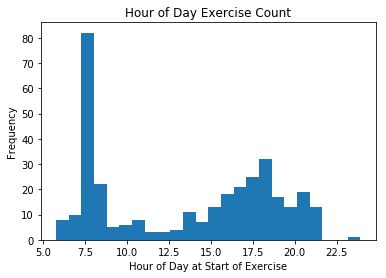

In [364]:
start_exercise_df = (exercise_df['start_time'].dt.hour + exercise_df['start_time'].dt.minute/60 + exercise_df['start_time'].dt.second/3600)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Hour of Day at Start of Exercise')
ax.set_ylabel('Frequency')
ax.set_title('Hour of Day Exercise Count')
ax.hist(start_exercise_df, bins=24)

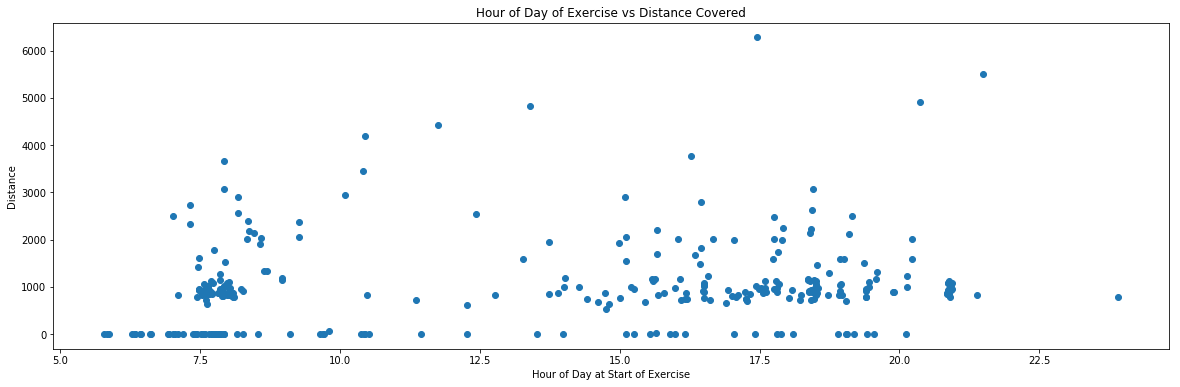

In [365]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('Hour of Day at Start of Exercise')
ax.set_ylabel('Distance')
ax.set_title('Hour of Day of Exercise vs Distance Covered')
ax.scatter(start_exercise_df, exercise_df['distance'])

In [256]:
pd.concat([exercise_df['duration'], exercise_df['end_time'].dt.date], axis=1)

,duration,end_time
0,870524,2018-04-07
1,1800000,2018-01-27
2,656856,2018-05-01
3,889686,2018-02-24
4,619392,2018-03-16
5,637979,2018-05-01
6,657513,2018-03-16
7,4135515,2017-12-29
8,614743,2018-02-28
9,1185743,2018-04-22


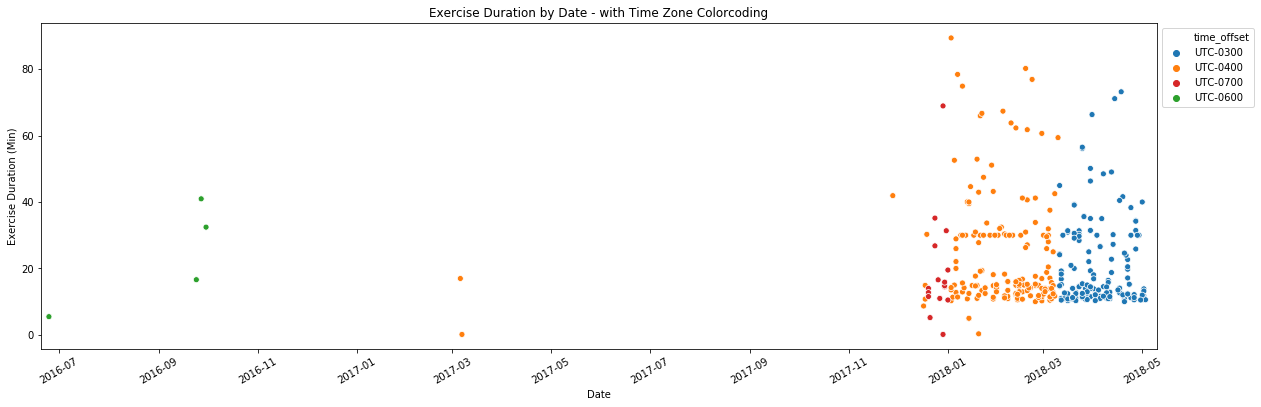

In [350]:
fig = plt.figure(figsize=(20, 6))
palette = {"UTC-0300":"C0","UTC-0400":"C1","UTC-0600":"C2", "UTC-0700":"C3"}
ax = sns.scatterplot(data=pd.concat([exercise_df['duration']/60000, exercise_df['end_time'].dt.date], axis=1), x='end_time',y='duration', hue=exercise_df['time_offset'], palette=palette)
ax = ax.set(xlabel='Date', ylabel='Exercise Duration (Min)', xlim=('2016-06-20', '2018-05-10'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Exercise Duration by Date - with Time Zone Colorcoding')
plt.show(ax)

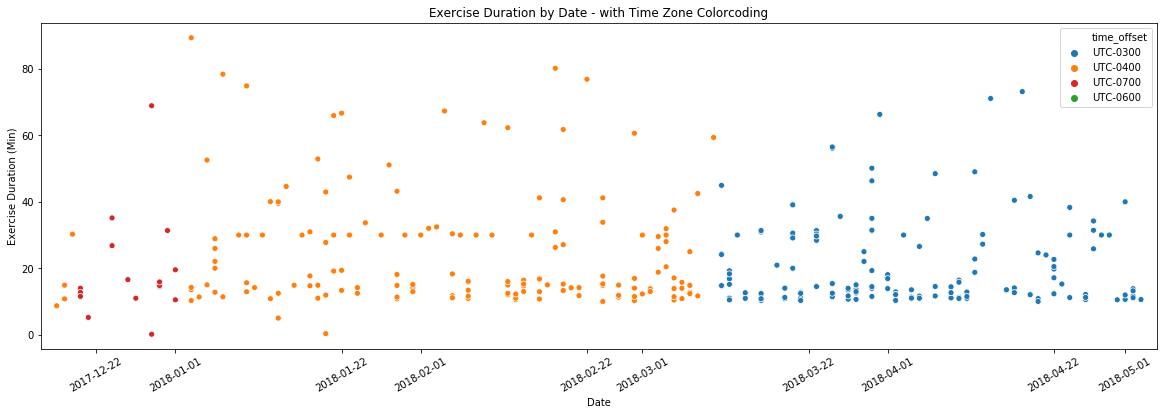

In [353]:
# Same plot as above, but truncated sparse dates before 2017-12-15
fig = plt.figure(figsize=(20, 6))
palette = {"UTC-0300":"C0","UTC-0400":"C1","UTC-0600":"C2", "UTC-0700":"C3"}
ax = sns.scatterplot(data=pd.concat([exercise_df['duration']/60000, exercise_df['end_time'].dt.date], axis=1), x='end_time',y='duration', hue=exercise_df['time_offset'], palette=palette)
ax = ax.set(xlabel='Date', ylabel='Exercise Duration (Min)', xlim=('2017-12-15', '2018-05-05'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Exercise Duration by Date - with Time Zone Colorcoding')
plt.show(ax)

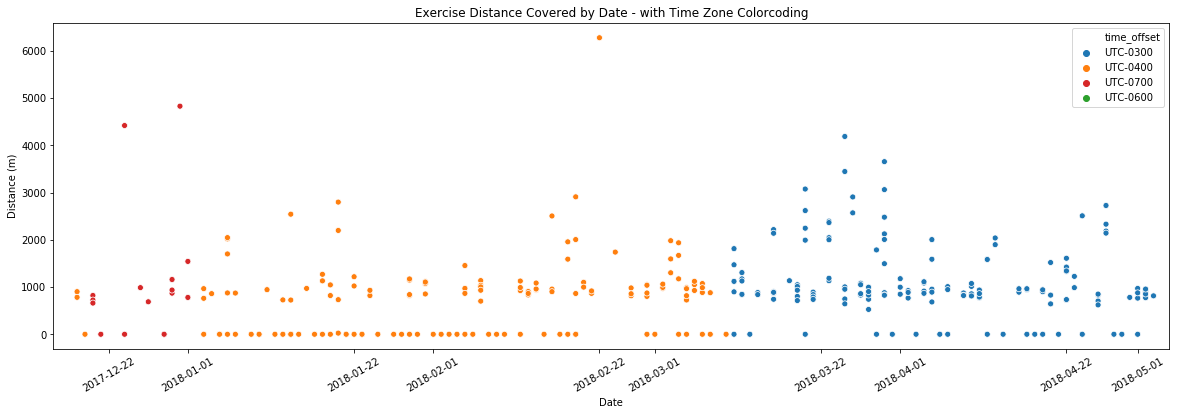

In [354]:
fig = plt.figure(figsize=(20, 6))
palette = {"UTC-0300":"C0","UTC-0400":"C1","UTC-0600":"C2", "UTC-0700":"C3"}
ax = sns.scatterplot(data=pd.concat([exercise_df['distance'], exercise_df['end_time'].dt.date], axis=1), x='end_time',y='distance', hue=exercise_df['time_offset'], palette=palette)
ax = ax.set(xlabel='Date', ylabel='Distance (m)', xlim=('2017-12-15', '2018-05-05'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Exercise Distance Covered by Date - with Time Zone Colorcoding')
plt.show(ax)

In [333]:
exercise_df['deviceuuid'].unique()

array(['F/D7+hL5E5', 'jQfnryI8/B'], dtype=object)

In [334]:
exercise_df[exercise_df['deviceuuid']=='F/D7+hL5E5']

,Unnamed: 0,end_time,altitude_loss,max_altitude,start_time,count,altitude_gain,exercise_custom_type,duration,deviceuuid,max_heart_rate,max_rpm,mean_heart_rate,pkg_name,max_cadence,time_offset,mean_caloricburn_rate,incline_distance,exercise_type,decline_distance,max_speed,mean_power,max_power,mean_rpm,calorie,mean_cadence,mean_speed,update_time,min_altitude,min_heart_rate,count_type,live_data,max_caloricburn_rate,custom,comment,additional,distance,datauuid,create_time
0,0,2018-04-07 17:40:40.673,NaN,NaN,2018-04-07 17:26:10.149,NaN,NaN,NaN,870524,F/D7+hL5E5,0.0,NaN,0.0,com.sec.android.app.shealth,0.000,UTC-0300,NaN,NaN,1001,NaN,1.588526,NaN,NaN,NaN,58.420,0.00000,1.257754,2018-04-07 17:41:42.416,NaN,0.0,NaN,009c4899-f8fb-c887-294a-045dcce7c880.live_data...,NaN,NaN,NaN,NaN,1008.610,009c4899-f8fb-c887-294a-045dcce7c880,2018-04-07 17:41:42.416
2,2,2018-05-01 18:12:20.915,NaN,NaN,2018-05-01 18:01:24.059,NaN,NaN,NaN,656856,F/D7+hL5E5,0.0,NaN,0.0,com.sec.android.app.shealth,0.000,UTC-0300,NaN,NaN,1001,NaN,1.571783,NaN,NaN,NaN,43.850,0.00000,1.323111,2018-05-01 18:13:21.374,NaN,0.0,NaN,020502c3-3cc7-8d33-f7bc-2d8e27609a47.live_data...,NaN,NaN,NaN,NaN,765.120,020502c3-3cc7-8d33-f7bc-2d8e27609a47,2018-05-01 18:13:21.374
3,3,2018-02-24 13:50:02.929,NaN,NaN,2018-02-24 13:35:13.243,NaN,NaN,NaN,889686,F/D7+hL5E5,0.0,NaN,0.0,com.sec.android.app.shealth,0.000,UTC-0400,NaN,NaN,11007,NaN,NaN,NaN,NaN,NaN,166.074,0.00000,NaN,2018-02-24 13:52:08.229,NaN,0.0,NaN,0282b74e-1956-64c6-8ac9-5c44afdcb6c1.live_data...,NaN,NaN,NaN,NaN,NaN,0282b74e-1956-64c6-8ac9-5c44afdcb6c1,2018-02-24 13:52:08.229
4,4,2018-03-16 17:25:39.584,NaN,NaN,2018-03-16 17:15:20.192,NaN,NaN,NaN,619392,F/D7+hL5E5,0.0,NaN,0.0,com.sec.android.app.shealth,0.000,UTC-0300,NaN,NaN,1001,NaN,1.611111,NaN,NaN,NaN,42.630,0.00000,1.413036,2018-03-16 17:26:39.581,NaN,0.0,NaN,02c7f233-9af6-3288-e412-21747dcd9a98.live_data...,NaN,NaN,NaN,NaN,741.521,02c7f233-9af6-3288-e412-21747dcd9a98,2018-03-16 17:26:39.581
7,7,2017-12-29 16:41:21.980,NaN,NaN,2017-12-29 15:32:24.297,NaN,NaN,NaN,4135515,F/D7+hL5E5,220.0,NaN,140.0,com.sec.android.app.shealth,0.000,UTC-0700,NaN,0.00,0,0.000,NaN,NaN,NaN,NaN,366.661,0.00000,0.000000,2017-12-30 12:01:22.159,NaN,79.0,NaN,05012792-1bd2-9582-a99d-2bbfa48d99da.live_data...,NaN,NaN,NaN,NaN,0.000,05012792-1bd2-9582-a99d-2bbfa48d99da,2017-12-29 16:41:22.192
8,8,2018-02-28 08:04:01.482,NaN,NaN,2018-02-28 07:53:46.739,NaN,NaN,NaN,614743,F/D7+hL5E5,0.0,NaN,0.0,com.sec.android.app.shealth,0.000,UTC-0400,NaN,NaN,1001,NaN,1.750000,NaN,NaN,NaN,49.230,0.00000,1.585639,2018-02-28 08:05:02.244,NaN,0.0,NaN,05daffcd-f6da-ea4c-ab78-80a7e748c324.live_data...,NaN,NaN,NaN,NaN,801.969,05daffcd-f6da-ea4c-ab78-80a7e748c324,2018-02-28 08:05:02.244
9,9,2018-04-22 08:58:38.605,NaN,NaN,2018-04-22 08:38:52.862,NaN,NaN,NaN,1185743,F/D7+hL5E5,0.0,NaN,0.0,com.sec.android.app.shealth,0.000,UTC-0300,NaN,NaN,1001,NaN,1.722222,NaN,NaN,NaN,76.540,0.00000,1.292390,2018-04-22 08:59:40.391,NaN,0.0,NaN,08f0454f-58f2-2a4b-b4ab-50bd261a6c85.live_data...,NaN,NaN,NaN,NaN,1333.693,08f0454f-58f2-2a4b-b4ab-50bd261a6c85,2018-04-22 08:59:40.391
10,10,2018-02-22 18:57:23.184,NaN,-112.719,2018-02-22 17:27:10.491,NaN,NaN,NaN,4614539,F/D7+hL5E5,168.0,NaN,143.0,com.sec.android.app.shealth,0.000,UTC-0400,NaN,725.18,1001,801.414,4.528000,NaN,NaN,NaN,467.891,0.00000,1.361327,2018-02-22 19:03:38.794,-138.032,92.0,NaN,09bdf298-4f39-64f3-1c5d-a97ab5fc59bc.live_data...,NaN,NaN,NaN,NaN,6279.134,09bdf298-4f39-64f3-1c5d-a97ab5fc59bc,2018-02-22 18:57:23.498
11,11,2018-03-23 09:44:04.809,NaN,NaN,2018-03-23 09:15:39.532,NaN,NaN,NaN,1705277,F/D7+hL5E5,0.0,NaN,0.0,com.sec.android.app.shealth,0.000,UTC-0300,NaN,NaN,1001,NaN,1.555556,NaN,NaN,NaN,119.510,0.00000,1.219204,2018-03-23 09:45:05.417,NaN,0.0,NaN,0a00c3e2-84a0-54c3-e74f-ca71a564a0d7.live_data...,NaN,NaN,NaN,NaN,2045.670,0a00c3e2-84a0-54c3-e74f-ca71a564a0d7,2018-03-23 09:45:05.417
12,12,2018-02-26 07:53:52.089,NaN,NaN,2018-02-26 07:38:56.435,NaN,NaN,NaN,895654,F/D7+hL5E5,0.0,NaN,0.0

In [335]:
exercise_df[exercise_df['deviceuuid']=='jQfnryI8/B']

,Unnamed: 0,end_time,altitude_loss,max_altitude,start_time,count,altitude_gain,exercise_custom_type,duration,deviceuuid,max_heart_rate,max_rpm,mean_heart_rate,pkg_name,max_cadence,time_offset,mean_caloricburn_rate,incline_distance,exercise_type,decline_distance,max_speed,mean_power,max_power,mean_rpm,calorie,mean_cadence,mean_speed,update_time,min_altitude,min_heart_rate,count_type,live_data,max_caloricburn_rate,custom,comment,additional,distance,datauuid,create_time
1,1,2018-01-27 10:08:00.000,NaN,NaN,2018-01-27 09:38:00.000,0.0,NaN,NaN,1800000,jQfnryI8/B,NaN,NaN,NaN,com.sec.android.app.shealth,NaN,UTC-0400,NaN,NaN,14001,NaN,NaN,NaN,NaN,NaN,252.000000,NaN,0.000000,2018-01-27 10:09:23.176,NaN,NaN,30004.0,NaN,NaN,NaN,NaN,NaN,0.00000,013f807f-0b24-45da-9df7-446c2e297a4f,2018-01-27 10:08:40.225
5,5,2018-05-01 17:46:01.000,NaN,NaN,2018-05-01 17:35:24.000,NaN,NaN,NaN,637979,jQfnryI8/B,NaN,NaN,NaN,com.sec.android.app.shealth,NaN,UTC-0300,NaN,NaN,1001,NaN,3.583333,NaN,NaN,NaN,66.030000,NaN,1.521429,2018-05-01 17:47:03.661,NaN,NaN,NaN,03982792-daba-4975-9382-325228d57e84.live_data...,NaN,NaN,NaN,NaN,970.64000,03982792-daba-4975-9382-325228d57e84,2018-05-01 17:47:03.661
6,6,2018-03-16 08:01:07.000,NaN,NaN,2018-03-16 07:50:10.000,NaN,NaN,NaN,657513,jQfnryI8/B,NaN,NaN,NaN,com.sec.android.app.shealth,NaN,UTC-0300,NaN,NaN,1001,NaN,2.694444,NaN,NaN,NaN,56.329998,NaN,1.331183,2018-03-16 08:04:32.061,NaN,NaN,NaN,0422c7e0-3636-478e-a11d-08a68edcb970.live_data...,NaN,NaN,NaN,NaN,875.27000,0422c7e0-3636-478e-a11d-08a68edcb970,2018-03-16 08:04:32.061
13,13,2018-01-06 16:30:00.000,NaN,NaN,2018-01-06 16:10:00.000,0.0,NaN,NaN,1200000,jQfnryI8/B,NaN,NaN,NaN,com.sec.android.app.shealth,NaN,UTC-0400,NaN,NaN,14001,NaN,NaN,NaN,NaN,NaN,168.000000,NaN,0.000000,2018-01-06 16:30:20.880,NaN,NaN,30004.0,NaN,NaN,NaN,NaN,NaN,0.00000,0a60fd51-1120-4f95-9184-8a9d75ed70d4,2018-01-06 16:30:15.204
14,14,2018-04-24 08:26:00.000,NaN,NaN,2018-04-24 07:56:00.000,0.0,NaN,NaN,1800000,jQfnryI8/B,NaN,NaN,NaN,com.sec.android.app.shealth,NaN,UTC-0300,NaN,NaN,14001,NaN,NaN,NaN,NaN,NaN,252.000000,NaN,0.000000,2018-04-25 08:26:52.757,NaN,NaN,30004.0,NaN,NaN,NaN,NaN,NaN,0.00000,0a6ee096-b530-4188-8e67-526ad8bf05be,2018-04-25 08:26:50.211
17,17,2018-04-05 20:39:37.000,NaN,NaN,2018-04-05 20:13:00.000,NaN,NaN,NaN,1597587,jQfnryI8/B,NaN,NaN,NaN,com.sec.android.app.shealth,NaN,UTC-0300,NaN,NaN,1001,NaN,2.500000,NaN,NaN,NaN,107.610000,NaN,1.254723,2018-04-05 20:40:55.746,NaN,NaN,NaN,0baf6986-2a13-4e6b-9ca5-3ab70af1e9d7.live_data...,NaN,NaN,NaN,NaN,2004.53000,0baf6986-2a13-4e6b-9ca5-3ab70af1e9d7,2018-04-05 20:40:55.746
18,18,2018-04-10 08:06:12.000,NaN,NaN,2018-04-10 07:55:00.000,NaN,NaN,NaN,672175,jQfnryI8/B,NaN,NaN,NaN,com.sec.android.app.shealth,NaN,UTC-0300,NaN,NaN,1001,NaN,2.388889,NaN,NaN,NaN,50.190002,NaN,1.274237,2018-04-10 08:08:07.195,NaN,NaN,NaN,0c346472-d47e-4d20-8707-cce4bc439cd6.live_data...,NaN,NaN,NaN,NaN,856.51000,0c346472-d47e-4d20-8707-cce4bc439cd6,2018-04-10 08:08:07.195
20,20,2018-01-14 07:55:00.000,NaN,NaN,2018-01-14 07:50:00.000,0.0,NaN,NaN,300000,jQfnryI8/B,NaN,NaN,NaN,com.sec.android.app.shealth,NaN,UTC-0400,NaN,NaN,1001,NaN,NaN,NaN,NaN,NaN,24.000000,NaN,0.000000,2018-01-14 08:38:59.453,NaN,NaN,30004.0,NaN,NaN,NaN,NaN,NaN,0.00000,0c7b2c9b-4000-4d2a-a12c-bc31a4edfec0,2018-01-14 08:38:56.490
23,23,2018-03-12 07:50:00.000,NaN,NaN,2018-03-12 07:39:00.000,NaN,NaN,NaN,660526,jQfnryI8/B,NaN,NaN,NaN,com.sec.android.app.shealth,NaN,UTC-0300,NaN,NaN,1001,NaN,2.444444,NaN,NaN,NaN,51.790000,NaN,1.275196,2018-03-12 08:31:17.302,NaN,NaN,NaN,1041936f-d87c-41f6-8cc5-55d529f2347e.live_data...,NaN,NaN,NaN,NaN,842.30000,1041936f-d87c-41f6-8cc5-55d529f2347e,2018-03-12 08:31:17.302
26,26,2018-02-12 07:41:02.000,NaN,NaN,2018-02-12 07:29:04.000,NaN,NaN,NaN,718958,jQfnryI8/B,NaN,NaN,NaN,com.sec.android.app.shealth,NaN,UTC-0400,NaN,NaN,1001,NaN,2.555556,NaN,NaN,NaN,55.010002,NaN,1.336295,2018-02-12 07:55:17.846,NaN,NaN,NaN,14558c7a-9acf-4d1c-8810-4d1218b1ba09.live_data...,NaN,NaN,NaN,NaN

### Observations
- Most data occurs between late 2017 and early May 2018
- Majority of exercise occures at 7:30-8AM - morning school/work commute time? Distance covered here is mostly around 1000m
- Majority of exercise duration falls below 20 minutes
- About a third of the data is recorded on a separate device - Phone and Fitbit?

# Heart Rate Data Analysis

In [12]:
heart_rate_df = pd.read_csv('../Project/heart_rate.csv')

In [17]:
heart_rate_df.head(10)

,Unnamed: 0,end_time,heart_rate,binning_data,start_time,heart_beat_count,update_time,max,min,pkg_name,time_offset,datauuid,create_time
0,0,2017-12-16 04:30:29.450,60.0,NaN,2017-12-16 04:30:29.450,1,2017-12-16 04:35:00.341,0.0,0.0,com.sec.android.app.shealth,UTC-0400,00978ee8-6b03-16cb-7bba-d22949a728cb,2017-12-16 04:35:00.341
1,1,2017-12-16 05:50:29.380,56.0,NaN,2017-12-16 05:50:29.380,1,2017-12-16 05:55:00.264,0.0,0.0,com.sec.android.app.shealth,UTC-0400,038d68e5-ddb9-df1f-f52f-4f85c32cb95a,2017-12-16 05:55:00.264
2,2,2017-12-30 02:08:16.211,55.0,NaN,2017-12-30 02:08:16.211,1,2017-12-30 02:08:16.411,0.0,0.0,com.sec.android.app.shealth,UTC-0700,0423adf2-6d1f-6e23-276b-ec25462bf3d5,2017-12-30 02:08:16.411
3,3,2018-01-15 14:47:37.175,62.0,NaN,2018-01-15 14:47:37.175,1,2018-01-15 14:47:37.371,0.0,0.0,com.sec.android.app.shealth,UTC-0400,07dc6531-0aa6-1b07-df29-049197357434,2018-01-15 14:47:37.371
4,4,2017-12-16 02:20:29.470,47.0,NaN,2017-12-16 02:20:29.470,1,2017-12-16 02:35:00.252,0.0,0.0,com.sec.android.app.shealth,UTC-0400,0a32cb55-8257-d3ae-e87a-e38ecb14fe97,2017-12-16 02:35:00.252
5,5,2016-07-03 01:29:08.880,68.0,NaN,2016-07-03 01:29:05.342,0,2016-07-03 01:29:20.441,NaN,NaN,com.sec.android.app.shealth,UTC-0600,0b326048-9df5-43ff-95d6-c9b610f2899c,2016-07-03 01:29:20.441
6,6,2017-12-19 15:38:54.920,164.0,NaN,2017-12-19 15:38:54.920,1,2017-12-19 15:39:03.147,0.0,0.0,com.sec.android.app.shealth,UTC-0400,0cb61f3f-b315-fc09-3fcf-8af21dafe368,2017-12-19 15:38:55.162
7,7,2018-04-19 16:11:00.403,144.0,NaN,2018-04-19 16:11:00.403,1,2018-04-19 16:11:00.632,0.0,0.0,com.sec.android.app.shealth,UTC-0300,0cbe2fd8-81fe-7ad0-e013-cbbdeac5292d,2018-04-19 16:11:00.632
8,8,2017-12-15 23:30:29.876,54.0,NaN,2017-12-15 23:30:29.876,1,2017-12-15 23:31:24.004,0.0,0.0,com.sec.android.app.shealth,UTC-0400,0cc8b507-bbfe-25ce-1cae-77df241bcf17,2017-12-15 23:31:24.004
9,9,2018-01-28 02:00:59.497,50.0,NaN,2018-01-28 02:00:59.497,1,2018-01-28 02:15:01.208,0.0,0.0,com.sec.android.app.shealth,UTC-0400,0ccd2c6e-e99b-1550-a217-2d004fc6da63,2018-01-28 02:15:01.208


In [235]:
heart_rate_df['start_time'] = pd.to_datetime(heart_rate_df['start_time'])
heart_rate_df['end_time'] = pd.to_datetime(heart_rate_df['end_time'])
heart_rate_df['update_time'] = pd.to_datetime(heart_rate_df['update_time'])
heart_rate_df['create_time'] = pd.to_datetime(heart_rate_df['create_time'])

In [236]:
heart_rate_df[heart_rate_df['end_time'] != heart_rate_df['start_time']]

,Unnamed: 0,end_time,heart_rate,binning_data,start_time,heart_beat_count,update_time,max,min,pkg_name,time_offset,datauuid,create_time
5,5,2016-07-03 01:29:08.880,68.0,NaN,2016-07-03 01:29:05.342,0,2016-07-03 01:29:20.441,NaN,NaN,com.sec.android.app.shealth,UTC-0600,0b326048-9df5-43ff-95d6-c9b610f2899c,2016-07-03 01:29:20.441
28,28,2016-06-23 10:46:05.795,60.0,NaN,2016-06-23 10:46:00.660,0,2016-06-23 10:46:10.279,NaN,NaN,com.sec.android.app.shealth,UTC-0600,1d2acab6-4d03-4ec8-9a2a-ea8f53b87b7a,2016-06-23 10:46:10.279
41,41,2016-06-09 14:41:09.456,52.0,NaN,2016-06-09 14:41:04.783,0,2016-06-09 14:41:38.226,NaN,NaN,com.sec.android.app.shealth,UTC+0530,24e78fa7-6904-4c9f-9c66-5ae7ab35edb0,2016-06-09 14:41:38.226
57,57,2016-06-13 23:33:56.559,61.0,NaN,2016-06-13 23:33:32.882,0,2016-06-13 23:34:03.373,NaN,NaN,com.sec.android.app.shealth,UTC+0530,318536f1-b6cd-44cf-b2cb-55ad862813e5,2016-06-13 23:34:03.373
61,61,2017-11-24 07:28:53.933,58.0,NaN,2017-11-24 07:28:47.812,0,2017-11-24 07:29:32.661,58.0,58.0,com.sec.android.app.shealth,UTC-0400,33837a69-47be-4df0-87f8-e5e728100ead,2017-11-24 07:29:32.661
83,83,2016-06-10 04:05:36.753,76.0,NaN,2016-06-10 04:05:33.590,0,2016-06-10 04:05:45.925,NaN,NaN,com.sec.android.app.shealth,UTC+0530,492ed1f5-c75d-427e-a671-1309d2b7b4c0,2016-06-10 04:05:45.925
85,85,2017-11-06 08:47:38.014,97.0,NaN,2017-11-06 08:47:32.436,0,2017-11-06 08:48:17.211,97.0,97.0,com.sec.android.app.shealth,UTC-0400,4b5046ae-7f50-43bf-bae8-14f3b7881a5f,2017-11-06 08:48:17.211
89,89,2016-06-11 01:29:38.666,61.0,NaN,2016-06-11 01:29:15.020,0,2016-06-11 01:29:51.197,NaN,NaN,com.sec.android.app.shealth,UTC+0530,4c93417f-7846-4192-8d92-dc81270fa9b1,2016-06-11 01:29:51.197
91,91,2016-10-27 01:25:00.205,50.0,NaN,2016-10-27 01:24:55.526,0,2016-10-27 01:25:12.492,NaN,NaN,com.sec.android.app.shealth,UTC-0600,4dbad212-1a00-495d-ac16-eb791cfaec87,2016-10-27 01:25:12.492
122,122,2017-05-13 21:24:05.235,58.0,NaN,2017-05-13 21:23:58.941,0,2017-05-13 21:24:34.521,58.0,58.0,com.sec.android.app.shealth,UTC-0300,61d0d53b-3de9-4018-98df-d45138b178f1,2017-05-13 21:24:34.521


In [246]:
heart_rate_df['end_time'].dt.date.sort_values()

230    1969-12-31
123    1969-12-31
41     2016-06-09
83     2016-06-10
89     2016-06-11
168    2016-06-11
196    2016-06-13
57     2016-06-13
170    2016-06-17
165    2016-06-19
28     2016-06-23
5      2016-07-03
264    2016-07-23
294    2016-08-13
167    2016-08-13
213    2016-10-27
91     2016-10-27
236    2017-02-12
235    2017-03-07
221    2017-05-13
122    2017-05-13
129    2017-09-16
210    2017-11-06
85     2017-11-06
151    2017-11-19
239    2017-11-19
61     2017-11-24
172    2017-11-25
184    2017-11-25
127    2017-11-28
          ...    
200    2018-01-28
150    2018-01-28
144    2018-01-28
262    2018-01-28
249    2018-01-28
166    2018-01-28
252    2018-02-15
244    2018-02-15
260    2018-02-15
120    2018-02-15
169    2018-02-18
143    2018-02-18
208    2018-03-04
141    2018-03-15
253    2018-03-15
288    2018-03-15
97     2018-03-21
278    2018-03-22
96     2018-03-22
51     2018-03-25
162    2018-03-30
126    2018-03-30
102    2018-03-30
12     2018-04-08
274    201

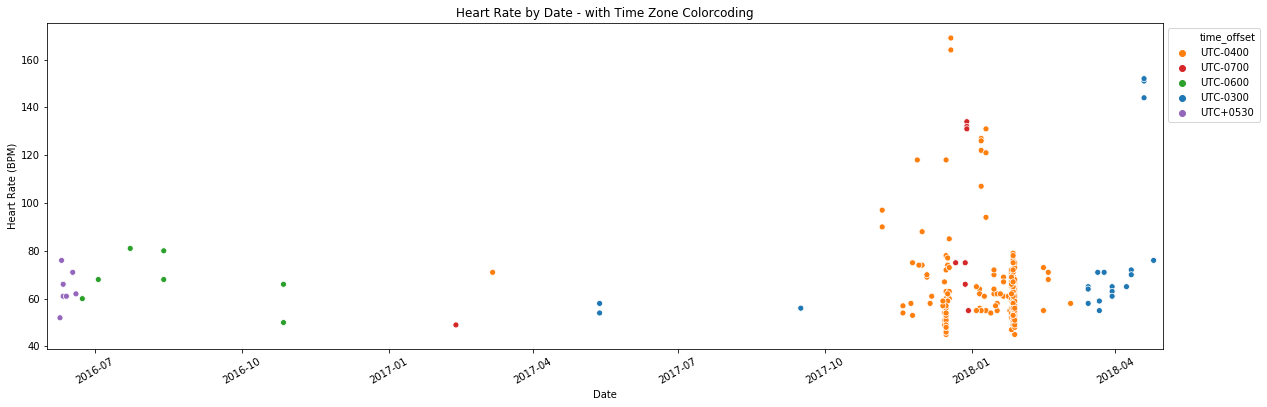

In [355]:
fig = plt.figure(figsize=(20, 6))
palette = {"UTC-0300":"C0","UTC-0400":"C1","UTC-0600":"C2", "UTC-0700":"C3", "UTC+0530":"C4"}
ax = sns.scatterplot(data=pd.concat([heart_rate_df['heart_rate'], heart_rate_df['end_time'].dt.date], axis=1), x='end_time',y='heart_rate', hue=heart_rate_df['time_offset'], palette=palette)
ax = ax.set(xlabel='Date', ylabel='Heart Rate (BPM)', xlim=('2016-06-01', '2018-05-01'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Heart Rate by Date - with Time Zone Colorcoding')
plt.show(ax)

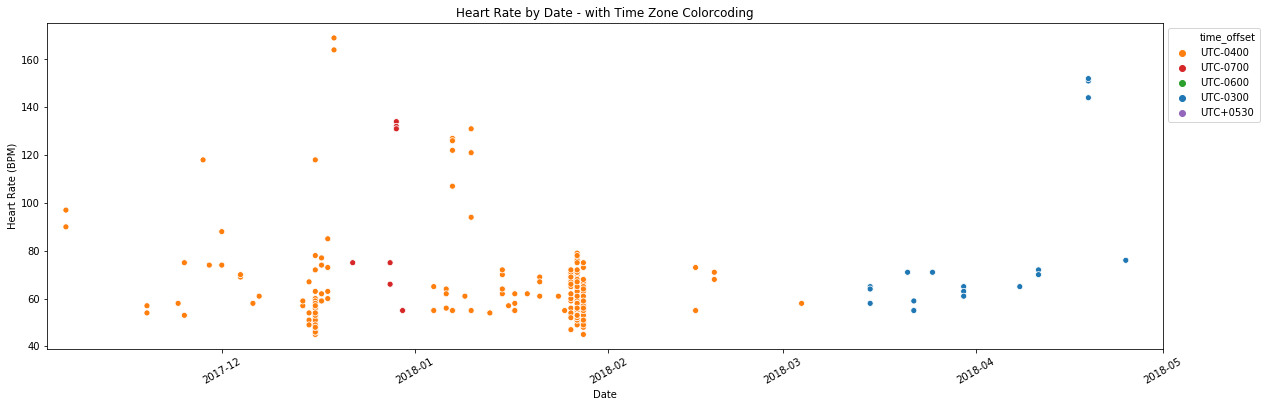

In [370]:
# Same plot as above, but truncated sparse dates before 2017-11-03
fig = plt.figure(figsize=(20, 6))
palette = {"UTC-0300":"C0","UTC-0400":"C1","UTC-0600":"C2", "UTC-0700":"C3", "UTC+0530":"C4"}
ax = sns.scatterplot(data=pd.concat([heart_rate_df['heart_rate'], heart_rate_df['end_time'].dt.date], axis=1), x='end_time',y='heart_rate', hue=heart_rate_df['time_offset'], palette=palette)
ax = ax.set(xlabel='Date', ylabel='Heart Rate (BPM)', xlim=('2017-11-03', '2018-05-01'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Heart Rate by Date - with Time Zone Colorcoding')
plt.show(ax)

### Observations
- Heart rate data is very sparse and sporadic. Most data points lie on about 4 days in late 2017 and early 2018, at a resting rate of ~45-80 BPM



# Step Count Data Analysis

In [10]:
step_count_df = pd.read_csv('../Project/step_count.csv')

In [14]:
step_count_df.head()

,Unnamed: 0,end_time,start_time,count,calorie,update_time,speed,pkg_name,time_offset,distance,datauuid,create_time
0,0,2018-04-30 18:21:59.999,2018-04-30 18:21:00.000,101,4.29,2018-04-30 18:35:00.291,1.527778,com.sec.android.app.shealth,UTC-0300,78.42,0001af94-3253-4fec-0efc-153d3a8a2441,2018-04-30 18:35:00.290
1,1,2018-04-13 19:47:59.999,2018-04-13 19:47:00.000,25,0.96,2018-04-13 19:55:00.251,1.027778,com.sec.android.app.shealth,UTC-0300,14.36,0001c2a5-c751-4c86-456f-179d46bd29a9,2018-04-13 19:55:00.251
2,2,2018-04-02 10:01:59.999,2018-04-02 10:01:00.000,38,1.53,2018-04-02 10:14:58.210,1.194444,com.sec.android.app.shealth,UTC-0300,24.19,0003c0db-c795-1f80-17a4-582751b3a2ba,2018-04-02 10:14:58.209
3,3,2018-04-27 10:52:59.999,2018-04-27 10:52:00.000,35,1.45,2018-04-27 10:55:01.281,1.500000,com.sec.android.app.shealth,UTC-0300,27.45,0006c29c-72a3-b207-069e-b098a9f96252,2018-04-27 10:55:01.280
4,4,2018-04-21 13:47:00.000,2018-04-21 13:46:00.000,0,0.00,2018-04-21 13:46:36.801,0.000000,com.sec.android.app.shealth,UTC-0300,0.00,001e163d-0af5-4e9a-b7c9-a9ceb6ca5e8c,2018-04-21 13:46:36.801


In [260]:
step_count_df['start_time'] = pd.to_datetime(step_count_df['start_time'])
step_count_df['end_time'] = pd.to_datetime(step_count_df['end_time'])
step_count_df['update_time'] = pd.to_datetime(step_count_df['update_time'])
step_count_df['create_time'] = pd.to_datetime(step_count_df['create_time'])

In [261]:
step_count_df['time_offset'].unique()

array(['UTC-0300'], dtype=object)

In [265]:
step_count_df['end_time'].dt.date.sort_values()

1555    2018-03-31
768     2018-03-31
8106    2018-03-31
4599    2018-03-31
8112    2018-03-31
8136    2018-03-31
4581    2018-03-31
4574    2018-03-31
740     2018-03-31
8189    2018-03-31
731     2018-03-31
8198    2018-03-31
727     2018-03-31
4532    2018-03-31
4527    2018-03-31
4522    2018-03-31
8227    2018-03-31
704     2018-03-31
8252    2018-03-31
8284    2018-03-31
690     2018-03-31
689     2018-03-31
686     2018-03-31
4507    2018-03-31
8302    2018-03-31
4497    2018-03-31
676     2018-03-31
2467    2018-03-31
8060    2018-03-31
2473    2018-03-31
           ...    
1770    2018-05-03
5857    2018-05-03
8622    2018-05-03
3526    2018-05-03
6912    2018-05-03
5325    2018-05-03
8756    2018-05-03
8333    2018-05-03
6805    2018-05-03
5350    2018-05-03
8741    2018-05-03
291     2018-05-03
4442    2018-05-03
7812    2018-05-03
6833    2018-05-03
4411    2018-05-03
8699    2018-05-03
6840    2018-05-03
8688    2018-05-03
497     2018-05-03
6847    2018-05-03
5552    2018

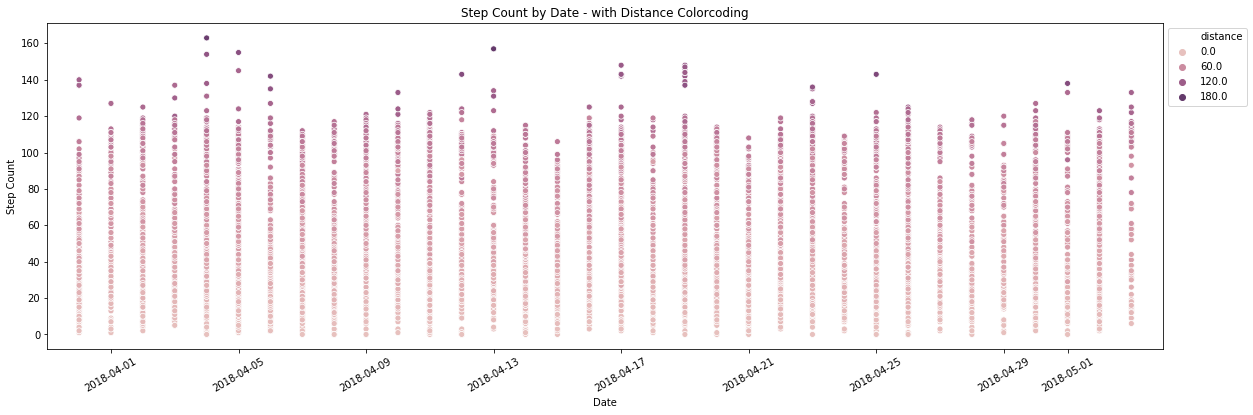

In [357]:
fig = plt.figure(figsize=(20, 6))
palette = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(data=pd.concat([step_count_df['count'], step_count_df['end_time'].dt.date], axis=1), x='end_time',y='count', hue=step_count_df['distance'], palette=palette)
ax = ax.set(xlabel='Date', ylabel='Step Count', xlim=('2018-03-30', '2018-05-04'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Step Count by Date - with Distance Colorcoding')
plt.show(ax)

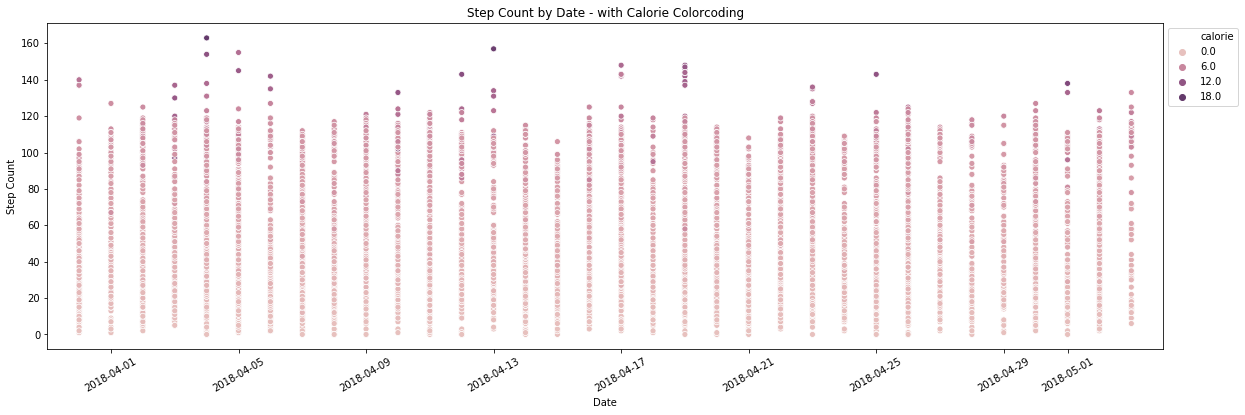

In [358]:
fig = plt.figure(figsize=(20, 6))
palette = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(data=pd.concat([step_count_df['count'], step_count_df['end_time'].dt.date], axis=1), x='end_time',y='count', hue=step_count_df['calorie'], palette=palette)
ax = ax.set(xlabel='Date', ylabel='Step Count', xlim=('2018-03-30', '2018-05-04'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Step Count by Date - with Calorie Colorcoding')
plt.show(ax)

### Observations
- Step data is recorded many times daily, but only between 2018-03-31 and 2018-05-03
- Looking at the start_time and end_time values, it can be seen that each data point is actually taken from the beginning of the minute to the end of the same minute. Therefore more data cleaning needs to be done to join step count recordings per session of exercise


# Floors Climbed Data Analysis

In [11]:
floors_climbed_df = pd.read_csv('../Project/floors_climbed.csv')

In [269]:
floors_climbed_df['start_time'] = pd.to_datetime(floors_climbed_df['start_time'])
floors_climbed_df['end_time'] = pd.to_datetime(floors_climbed_df['end_time'])
floors_climbed_df['update_time'] = pd.to_datetime(floors_climbed_df['update_time'])
floors_climbed_df['create_time'] = pd.to_datetime(floors_climbed_df['create_time'])

In [270]:
floors_climbed_df['time_offset'].unique()

array(['UTC-0400', 'UTC-0300', 'UTC-0700'], dtype=object)

In [271]:
floors_climbed_df['end_time'].dt.date.sort_values()

349    2017-12-16
124    2017-12-16
268    2017-12-17
249    2017-12-18
395    2017-12-18
132    2017-12-18
201    2017-12-18
310    2017-12-18
318    2017-12-18
109    2017-12-18
511    2017-12-19
358    2017-12-19
293    2017-12-20
306    2017-12-20
120    2017-12-20
481    2017-12-20
367    2017-12-20
490    2017-12-20
101    2017-12-21
526    2017-12-21
538    2017-12-21
437    2017-12-21
385    2017-12-22
392    2017-12-22
87     2017-12-22
366    2017-12-23
261    2017-12-23
352    2017-12-23
338    2017-12-23
325    2017-12-23
          ...    
535    2018-04-25
496    2018-04-26
228    2018-04-26
248    2018-04-26
68     2018-04-26
323    2018-04-26
229    2018-04-26
379    2018-04-28
371    2018-04-28
41     2018-04-30
335    2018-04-30
517    2018-04-30
507    2018-04-30
96     2018-04-30
386    2018-05-01
435    2018-05-01
238    2018-05-01
139    2018-05-02
381    2018-05-02
451    2018-05-02
450    2018-05-02
479    2018-05-02
291    2018-05-02
390    2018-05-02
508    201

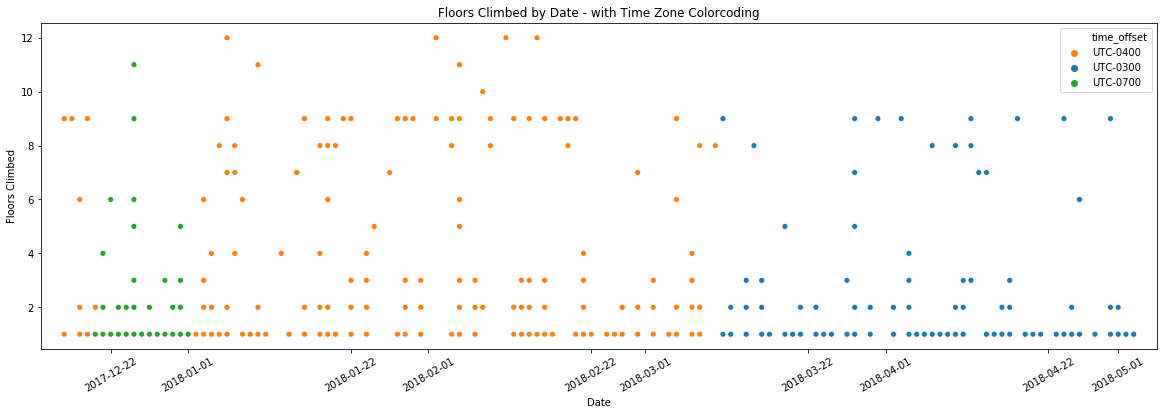

In [359]:
fig = plt.figure(figsize=(20, 6))
palette = {"UTC-0300":"C0","UTC-0400":"C1","UTC-0700":"C2"}
ax = sns.scatterplot(data=pd.concat([floors_climbed_df['floor'], floors_climbed_df['end_time'].dt.date], axis=1), x='end_time',y='floor', hue=floors_climbed_df['time_offset'], palette=palette)
ax = ax.set(xlabel='Date', ylabel='Floors Climbed', xlim=('2017-12-13', '2018-05-06'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Floors Climbed by Date - with Time Zone Colorcoding')
plt.show(ax)

In [279]:
floors_climbed_df.sort_values('end_time')

,Unnamed: 0,end_time,pkg_name,time_offset,start_time,floor,datauuid,update_time,create_time
349,349,2017-12-16 08:48:18,com.sec.android.app.shealth,UTC-0400,2017-12-16 08:46:12,9.0,a964f836-83e1-5a73-203c-23e66833a6f9,2017-12-16 08:48:49.079,2017-12-16 08:48:48.886
124,124,2017-12-16 11:28:23,com.sec.android.app.shealth,UTC-0400,2017-12-16 11:28:13,1.0,38a818a5-1b9b-e238-585e-a1f73c11a848,2017-12-16 11:32:40.721,2017-12-16 11:32:40.719
268,268,2017-12-17 17:48:36,com.sec.android.app.shealth,UTC-0400,2017-12-17 17:46:26,9.0,7e24a616-4f11-3553-a797-5cb6bb302e0d,2017-12-17 17:50:31.878,2017-12-17 17:47:23.443
201,201,2017-12-18 08:16:28,com.sec.android.app.shealth,UTC-0400,2017-12-18 08:12:32,6.0,5cc29833-0332-15f2-4dc7-7f6b0df38b92,2017-12-18 08:16:30.590,2017-12-18 08:15:13.725
109,109,2017-12-18 09:15:38,com.sec.android.app.shealth,UTC-0400,2017-12-18 09:15:09,1.0,31ef213a-bfb8-0963-8383-72f8fd539f75,2017-12-18 09:15:39.715,2017-12-18 09:15:36.285
249,249,2017-12-18 09:20:51,com.sec.android.app.shealth,UTC-0400,2017-12-18 09:20:30,1.0,759741f0-e2bc-8532-4c01-8e2f9f92ff2d,2017-12-18 09:23:53.896,2017-12-18 09:23:53.896
318,318,2017-12-18 15:47:56,com.sec.android.app.shealth,UTC-0400,2017-12-18 15:46:31,2.0,9cab0653-e4a2-4498-ae8e-32111c100127,2017-12-18 15:49:37.754,2017-12-18 15:49:37.720
132,132,2017-12-18 15:50:51,com.sec.android.app.shealth,UTC-0400,2017-12-18 15:50:25,1.0,3c312f18-1989-db3b-b22b-69f0254a4d02,2017-12-18 15:50:52.432,2017-12-18 15:50:40.431
395,395,2017-12-18 16:36:44,com.sec.android.app.shealth,UTC-0400,2017-12-18 16:36:16,1.0,bd090168-68e8-67b1-ad89-2aefd1d17df2,2017-12-18 16:36:45.876,2017-12-18 16:36:45.875
310,310,2017-12-18 16:39:22,com.sec.android.app.shealth,UTC-0400,2017-12-18 16:38:49,1.0,97c2c2a5-2a9c-92b7-0414-78e0b2a417f9,2017-12-18 16:42:15.672,2017-12-18 16:39:12.548


In [280]:
floors_climbed_df[floors_climbed_df['floor']==12]

,Unnamed: 0,end_time,pkg_name,time_offset,start_time,floor,datauuid,update_time,create_time
378,378,2018-02-11 19:22:17,com.sec.android.app.shealth,UTC-0400,2018-02-11 19:19:34,12.0,b885ebf7-cef3-b133-17a8-37f3217203c0,2018-02-11 19:22:44.052,2018-02-11 19:20:21.845
402,402,2018-01-06 21:03:38,com.sec.android.app.shealth,UTC-0400,2018-01-06 21:01:12,12.0,c11460c4-1a84-e9f2-a5cc-98a15f604035,2018-01-06 21:03:38.596,2018-01-06 21:02:52.877
431,431,2018-02-02 20:29:19,com.sec.android.app.shealth,UTC-0400,2018-02-02 20:26:48,12.0,cc412a50-e875-1a23-a558-6610d0c64cc0,2018-02-02 20:29:47.057,2018-02-02 20:29:46.865
449,449,2018-02-15 15:01:50,com.sec.android.app.shealth,UTC-0400,2018-02-15 14:59:27,12.0,d937fffa-8122-d2dd-d8a7-91915a481771,2018-02-15 15:03:45.137,2018-02-15 15:03:44.942


### Observations
- Most of the data point create_times are minutes after the corresponding end_time: Are these datapoints automatically generated or entered by the user? If automatically generated, how does it trigger? 


In [300]:
pd.to_datetime(exercise_df[exercise_df['altitude_gain'].notnull()]['end_time'].dt.date)

112   2016-09-24
122   2017-03-06
146   2017-03-07
189   2017-11-28
208   2016-09-30
255   2016-06-25
299   2016-09-27
Name: end_time, dtype: datetime64[ns]

In [301]:
floors_climbed_df[pd.to_datetime(floors_climbed_df['end_time'].dt.date).isin(pd.to_datetime(exercise_df[exercise_df['altitude_gain'].notnull()]['end_time'].dt.date))] 
# Exercise data days with altitude data does not overlap with floors_climbed data - Can't tell

,Unnamed: 0,end_time,pkg_name,time_offset,start_time,floor,datauuid,update_time,create_time


# To Do:
- Check sleep times and durations on and around the days where the timezone transitions
- Clean up step count readings by exercise sessions
- Reflect daylight savings changes